# Injection comparision with e0=0.1
## TaylorF2EccPerAdvFD(Leading order e0 and e) Vs TaylorF2EccPerAdvFD1PNAmp Vs TaylorF2Ecc(3.5PN phase) Vs TaylorF2(3.0PN phase)

In [42]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [43]:
# mass to chirp_mass and mass_ratio conversion 
mass_1 = 6.5
mass_2 = 5.8

chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1
print("chirp_mass = {}, mass_ratio = {}".format(chirp_mass, mass_ratio))

ff = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
print(ff)

chirp_mass = 5.34347507377356, mass_ratio = 0.8923076923076922
357.3995964991056


In [44]:
time_of_event = 1126259642.413
post_trigger_duration = 1.0
duration = 16.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 1024.

# Frequency point check.
## difference between TaylorF2EccPerAdvFD and TaylorF2EccPerAdvFD1PNAmp is quite small. e0=0.1

In [8]:
%timeit bilby.gw.source.lal_TaylorF2EccPerAdvFD(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

227 µs ± 454 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
%timeit bilby.gw.source.lal_TaylorF2EccPerAdvFDLeO(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

152 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
%timeit bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmp(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

537 µs ± 50.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
%timeit bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmpLeO(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

244 µs ± 6.91 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
%timeit bilby.gw.source.lal_taylorF2Ecc_fd(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.0, 0.0, 0.4, 1.3)

108 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [14]:
%timeit bilby.gw.source.lal_taylorF2_fd(np.array([20,30,40]), 6.5, 5.8, 200, 0.0, 0.0, 0.4, 1.3)

101 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [45]:
############# TaylorF2EccPerAdvFD waveform model ################
injection_parameters = dict(
     mass_1=6.5, mass_2=5.8, eccentricity=0.1, luminosity_distance=200.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='TaylorF2EccPerAdvFD',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_TaylorF2EccPerAdvFD,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

02:52 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_TaylorF2EccPerAdvFD
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
02:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:52 bilby INFO    : Injected signal in H1:
02:52 bilby INFO    :   optimal SNR = 32.77
02:52 bilby INFO    :   matched filter SNR = 33.35-1.04j
02:52 bilby INFO    :   mass_1 = 6.5
02:52 bilby INFO    :   mass_2 = 5.8
02:52 bilby INFO    :   eccentricity = 0.1
02:52 bilby INFO    :   luminosity_distance = 200.0
02:52 bilby INFO    :   theta_jn = 0.4
02:52 bilby INFO    :   psi = 2.659
02:52 bilby INFO    :   phase = 1.3
02:52 bilby INFO    :   geocent_time = 1126259642.413
02:52 bilby INFO    :   ra = 1.375
02:52 bilby INFO    :   dec = -1.2108
02:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:52 bilby INFO    : Injected si

[{'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.56585819e-30+5.25189884e-30j, 1.55975626e-30+5.25062730e-30j,
         1.55366199e-30+5.24934973e-30j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -5.23419307e-30+1.56057920e-30j, -5.23292582e-30+1.55449784e-30j,
         -5.23165256e-30+1.54842412e-30j])},
 {'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.56585819e-30+5.25189884e-30j, 1.55975626e-30+5.25062730e-30j,
         1.55366199e-30+5.24934973e-30j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -5.23419307e-30+1.56057920e-30j, -5.23292582e-30+1.55449784e-30j,
         -5.23165256e-30+1.54842412e-30j])}]

In [46]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

42.16929951832011

In [47]:
############# TaylorF2EccPerAdvFDLeO waveform model ################
injection_parameters1 = dict(
     mass_1=6.5, mass_2=5.8, eccentricity=0.1, luminosity_distance=200.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments1 = dict(waveform_approximant='TaylorF2EccPerAdvFDLeO',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator1 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_TaylorF2EccPerAdvFDLeO,
    parameters=injection_parameters1, waveform_arguments=waveform_arguments1)

ifos1 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos1.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos1.inject_signal(waveform_generator=waveform_generator1,
                   parameters=injection_parameters1)

02:52 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_TaylorF2EccPerAdvFDLeO
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
02:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:52 bilby INFO    : Injected signal in H1:
02:52 bilby INFO    :   optimal SNR = 32.80
02:52 bilby INFO    :   matched filter SNR = 33.90-0.74j
02:52 bilby INFO    :   mass_1 = 6.5
02:52 bilby INFO    :   mass_2 = 5.8
02:52 bilby INFO    :   eccentricity = 0.1
02:52 bilby INFO    :   luminosity_distance = 200.0
02:52 bilby INFO    :   theta_jn = 0.4
02:52 bilby INFO    :   psi = 2.659
02:52 bilby INFO    :   phase = 1.3
02:52 bilby INFO    :   geocent_time = 1126259642.413
02:52 bilby INFO    :   ra = 1.375
02:52 bilby INFO    :   dec = -1.2108
02:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:52 bilby INFO    : Injected

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [48]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos1]
np.sqrt(np.sum([i ** 2 for i in snrs]))

42.19785897353199

In [49]:
############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
injection_parameters2 = dict(
     mass_1=6.5, mass_2=5.8, eccentricity=0.1, luminosity_distance=200.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments2 = dict(waveform_approximant='TaylorF2EccPerAdvFD1PNAmp',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmp,
    parameters=injection_parameters2, waveform_arguments=waveform_arguments2)

ifos2 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos2.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)

02:52 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmp
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
02:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:52 bilby INFO    : Injected signal in H1:
02:52 bilby INFO    :   optimal SNR = 31.25
02:52 bilby INFO    :   matched filter SNR = 30.69-0.30j
02:52 bilby INFO    :   mass_1 = 6.5
02:52 bilby INFO    :   mass_2 = 5.8
02:52 bilby INFO    :   eccentricity = 0.1
02:52 bilby INFO    :   luminosity_distance = 200.0
02:52 bilby INFO    :   theta_jn = 0.4
02:52 bilby INFO    :   psi = 2.659
02:52 bilby INFO    :   phase = 1.3
02:52 bilby INFO    :   geocent_time = 1126259642.413
02:52 bilby INFO    :   ra = 1.375
02:52 bilby INFO    :   dec = -1.2108
02:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:52 bilby INFO    : Injec

[{'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         5.67878168e-28-3.35811095e-27j, 5.55998617e-28-3.34046796e-27j,
         5.44041137e-28-3.32291319e-27j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         3.34678717e-27+5.65964438e-28j, 3.32920366e-27+5.54124934e-28j,
         3.31170807e-27+5.42207764e-28j])},
 {'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         5.67878168e-28-3.35811095e-27j, 5.55998617e-28-3.34046796e-27j,
         5.44041137e-28-3.32291319e-27j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         3.34678717e-27+5.65964438e-28j, 3.32920366e-27+5.54124934e-28j,
         3.31170807e-27+5.42207764e-28j])}]

In [50]:
snrs = [ifo2.meta_data["optimal_SNR"] for ifo2 in ifos2]
np.sqrt(np.sum([i ** 2 for i in snrs]))

40.21431586048834

In [51]:
############# TaylorF2EccPerAdvFD1PNAmpLeO ################
injection_parameters3 = dict(
     mass_1=6.5, mass_2=5.8, eccentricity=0.1, luminosity_distance=200.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments3 = dict(waveform_approximant='TaylorF2EccPerAdvFD1PNAmpLeO',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator3 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmpLeO,
    parameters=injection_parameters3, waveform_arguments=waveform_arguments3)

ifos3 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos3.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters3)

02:52 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmpLeO
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
02:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:52 bilby INFO    : Injected signal in H1:
02:52 bilby INFO    :   optimal SNR = 31.28
02:52 bilby INFO    :   matched filter SNR = 31.92-0.75j
02:52 bilby INFO    :   mass_1 = 6.5
02:52 bilby INFO    :   mass_2 = 5.8
02:52 bilby INFO    :   eccentricity = 0.1
02:52 bilby INFO    :   luminosity_distance = 200.0
02:52 bilby INFO    :   theta_jn = 0.4
02:52 bilby INFO    :   psi = 2.659
02:52 bilby INFO    :   phase = 1.3
02:52 bilby INFO    :   geocent_time = 1126259642.413
02:52 bilby INFO    :   ra = 1.375
02:52 bilby INFO    :   dec = -1.2108
02:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:52 bilby INFO    : In

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -4.96642833e-27-4.23662727e-27j, -4.97916953e-27-4.25644157e-27j,
         -4.99182680e-27-4.27633422e-27j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.19848180e-26-7.25667207e-27j, -2.19590606e-26-7.30763807e-27j,
         -2.19331711e-26-7.35849364e-27j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -4.96642833e-27-4.23662727e-27j, -4.97916953e-27-4.25644157e-27j,
         -4.99182680e-27-4.27633422e-27j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.19848180e-26-7.25667207e-27j, -2.19590606e-26-7.30763807e-27j,
         -2.19331711e-26-7.35849364e-27j])}]

In [52]:
snrs = [ifo3.meta_data["optimal_SNR"] for ifo3 in ifos3]
np.sqrt(np.sum([i ** 2 for i in snrs]))

40.25377408923305

In [53]:
############# TaylorF2 waveform model ################
injection_parameters4 = dict(
    mass_1=6.5, mass_2=5.8, a_1=0.0, a_2=0.0, luminosity_distance=200., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments4 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator4 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2_fd,
    parameters=injection_parameters4, waveform_arguments=waveform_arguments4)

ifos4 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos4.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos4.inject_signal(waveform_generator=waveform_generator4,
                   parameters=injection_parameters4)

02:52 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
02:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:52 bilby INFO    : Injected signal in H1:
02:52 bilby INFO    :   optimal SNR = 33.38
02:52 bilby INFO    :   matched filter SNR = 33.21+0.43j
02:52 bilby INFO    :   mass_1 = 6.5
02:52 bilby INFO    :   mass_2 = 5.8
02:52 bilby INFO    :   a_1 = 0.0
02:52 bilby INFO    :   a_2 = 0.0
02:52 bilby INFO    :   luminosity_distance = 200.0
02:52 bilby INFO    :   theta_jn = 0.4
02:52 bilby INFO    :   psi = 2.659
02:52 bilby INFO    :   phase = 1.3
02:52 bilby INFO    :   geocent_time = 1126259642.413
02:52 bilby INFO    :   ra = 1.375
02:52 bilby INFO    :   dec = -1.2108
02:52 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:52 bilby INFO

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -7.00432155e-25-7.23435065e-25j, -6.99939830e-25-7.23711898e-25j,
         -6.99447515e-25-7.23988362e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -7.20996143e-25+6.98070783e-25j, -7.21272043e-25+6.97580118e-25j,
         -7.21547575e-25+6.97089463e-25j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -7.00432155e-25-7.23435065e-25j, -6.99939830e-25-7.23711898e-25j,
         -6.99447515e-25-7.23988362e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -7.20996143e-25+6.98070783e-25j, -7.21272043e-25+6.97580118e-25j,
         -7.21547575e-25+6.97089463e-25j])}]

In [54]:
snrs = [ifo4.meta_data["optimal_SNR"] for ifo4 in ifos4]
np.sqrt(np.sum([i ** 2 for i in snrs]))

42.94372695886261

02:54 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:54 bilby INFO    : Injected signal in H1:
02:54 bilby INFO    :   optimal SNR = 32.77
02:54 bilby INFO    :   matched filter SNR = 98.90-1.04j
02:54 bilby INFO    :   mass_1 = 6.5
02:54 bilby INFO    :   mass_2 = 5.8
02:54 bilby INFO    :   eccentricity = 0.1
02:54 bilby INFO    :   luminosity_distance = 200.0
02:54 bilby INFO    :   theta_jn = 0.4
02:54 bilby INFO    :   psi = 2.659
02:54 bilby INFO    :   phase = 1.3
02:54 bilby INFO    :   geocent_time = 1126259642.413
02:54 bilby INFO    :   ra = 1.375
02:54 bilby INFO    :   dec = -1.2108
02:54 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:54 bilby INFO    : Injected signal in L1:
02:54 bilby INFO    :   optimal SNR = 26.54
02:54 bilby INFO    :   matched filter SNR = 80.67+0.09j
02:54 bilby INFO    :   mass_1 = 6.5
02:54 bilby INFO    :   mass_2 = 5.8
02:54 bilby INFO    :   eccentricity = 0.1
02:54 bilby INFO    

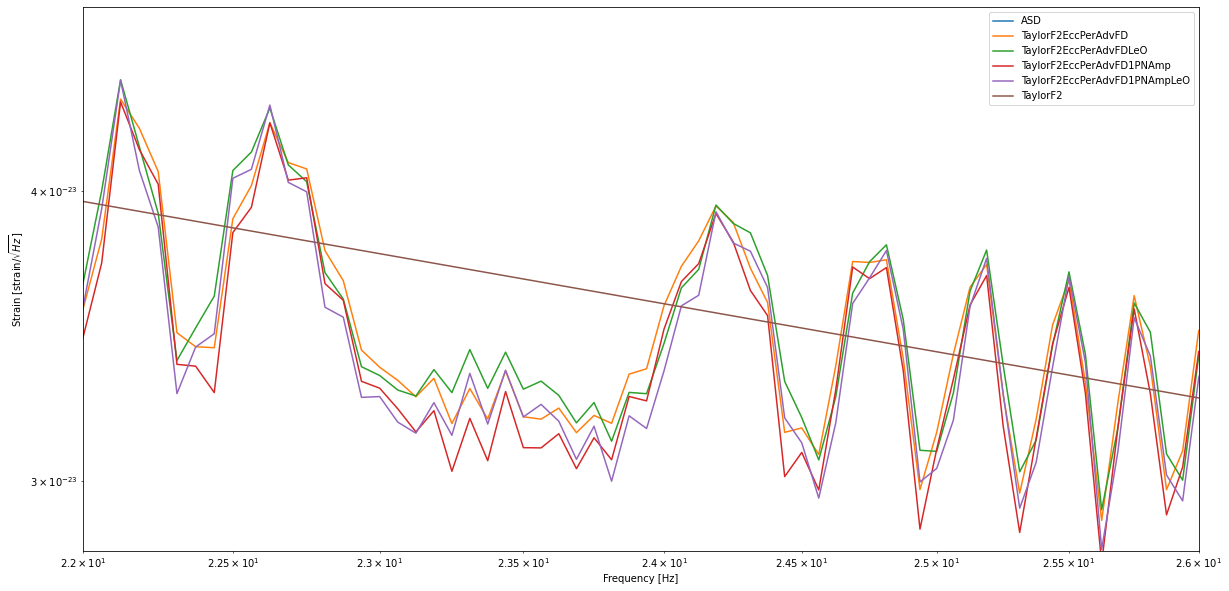

In [62]:
#to plot the frequency domain  
############# TaylorF2EccPerAdvFD waveform model ################
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]
idxs = H1.strain_data.frequency_mask  

############# TaylorF2EccPerAdvFDLeO waveform model ################
injection1 = ifos1.inject_signal(waveform_generator=waveform_generator1,
                   parameters=injection_parameters1)
H11 = ifos1[0]
H1_injection1 = injection1[0]
idxs1 = H11.strain_data.frequency_mask

############# TaylorF2EccPerAdvFD1PNAmp ################
injection2 = ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)
H12 = ifos2[0]
H1_injection2 = injection2[0]
idxs2 = H12.strain_data.frequency_mask

############# TaylorF2EccPerAdvFD1PNAmpLeO waveform model ################
injection3 = ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters3)
H13 = ifos3[0]
H1_injection3 = injection3[0]
idxs3 = H13.strain_data.frequency_mask

############# TaylorF2 waveform model ################
injection4 = ifos4.inject_signal(waveform_generator=waveform_generator4,
                   parameters=injection_parameters4)
H14 = ifos4[0]
H1_injection4 = injection4[0]
idxs4 = H14.strain_data.frequency_mask

############# TaylorF2EccPerAdvFD waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")'''
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")

ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFDLeO waveform model ################
ax.loglog(H11.frequency_array[idxs1],
          np.abs(H1_injection1["plus"][idxs1]),
          label="TaylorF2EccPerAdvFDLeO")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2EccPerAdvFD1PNAmpLeO waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2EccPerAdvFD1PNAmpLeO")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.abs(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
ax.set_xlim(22.,26.)
ax.set_ylim(2.8e-23,0.48e-22)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.rcParams['figure.figsize'] = [20, 10]
ax.legend()
plt.show()

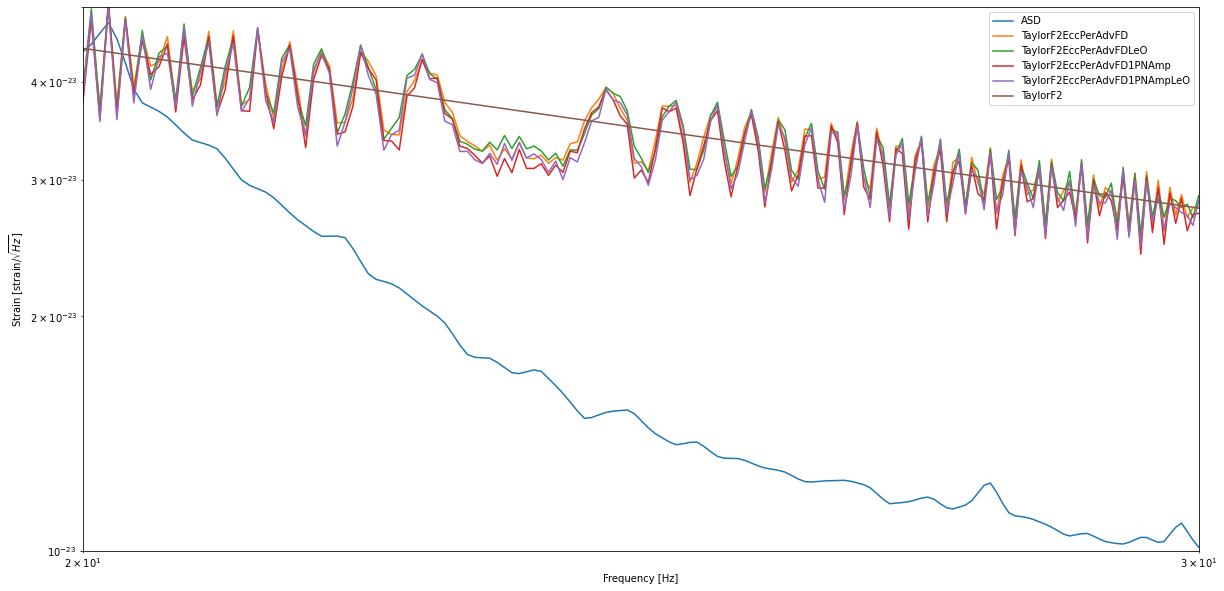

In [61]:
############# TaylorF2EccPerAdvFD waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")'''
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")

ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFDLeO waveform model ################
ax.loglog(H11.frequency_array[idxs1],
          np.abs(H1_injection1["plus"][idxs1]),
          label="TaylorF2EccPerAdvFDLeO")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2EccPerAdvFD1PNAmpLeO waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2EccPerAdvFD1PNAmpLeO")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.abs(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
#############################
ax.set_xlim(20.,30.)
ax.set_ylim(1e-23,0.5e-22)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.rcParams['figure.figsize'] = [20, 10]
ax.legend()
plt.show()

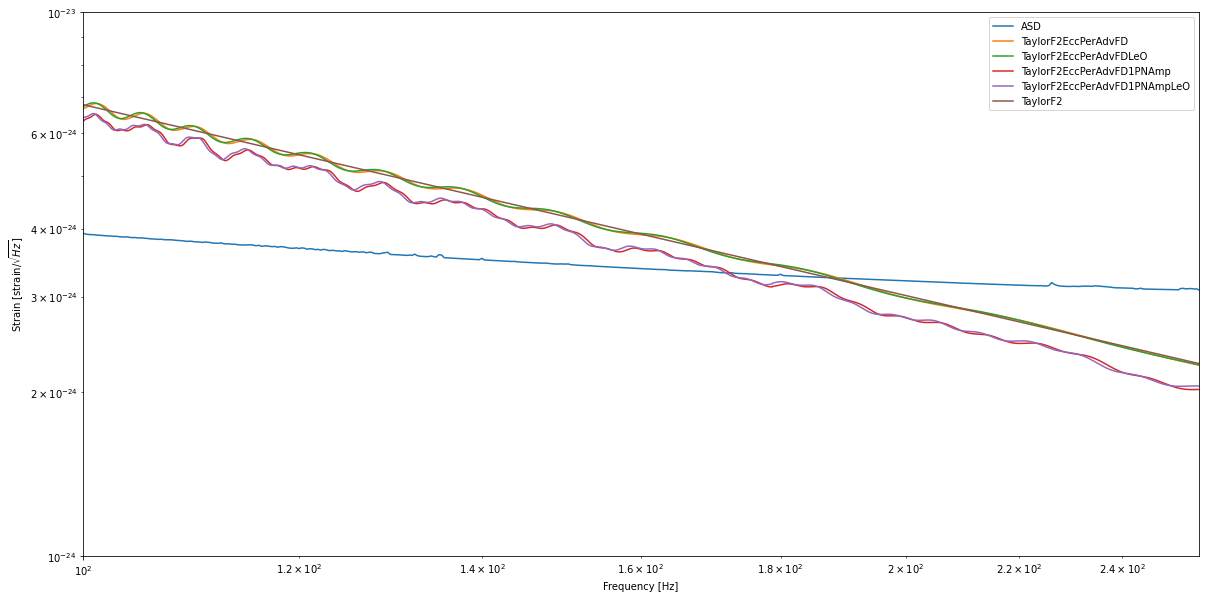

In [57]:
############# TaylorF2EccPerAdvFD waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")'''
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")

ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFDLeO waveform model ################
ax.loglog(H11.frequency_array[idxs1],
          np.abs(H1_injection1["plus"][idxs1]),
          label="TaylorF2EccPerAdvFDLeO")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2EccPerAdvFD1PNAmpLeO waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2EccPerAdvFD1PNAmpLeO")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.abs(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
ax.set_xlim(100.,256.)
ax.set_ylim(1e-24,1e-23)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.rcParams['figure.figsize'] = [20, 10]
ax.legend()
plt.show()

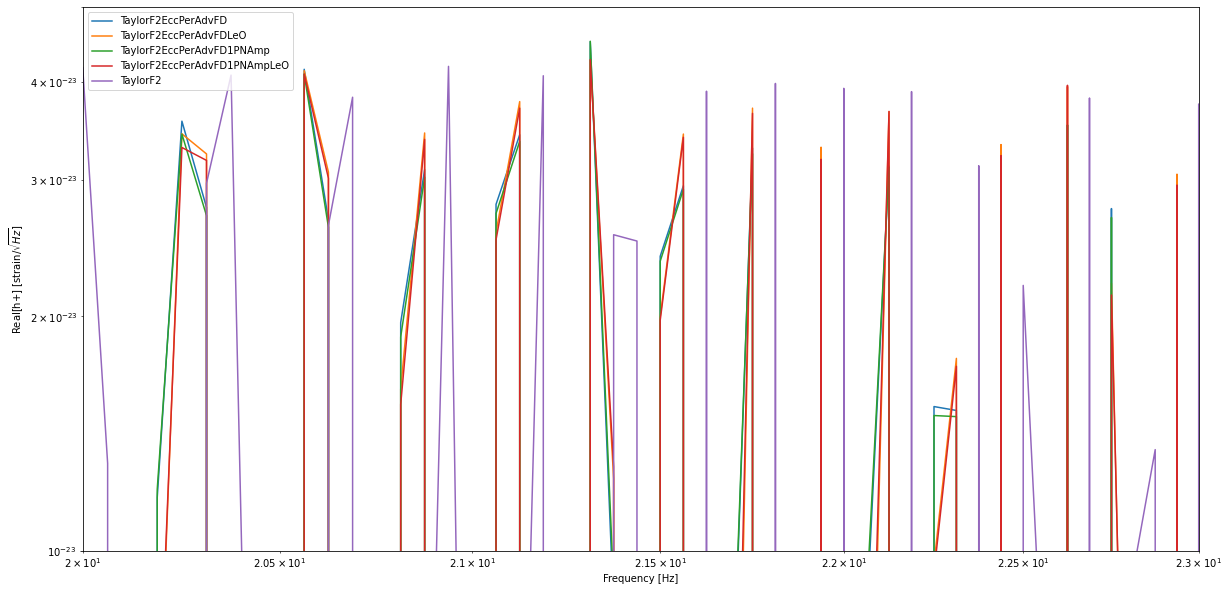

In [58]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFDLeO waveform model ################
ax.loglog(H11.frequency_array[idxs1],
          np.real(H1_injection1["plus"][idxs1]),
          label="TaylorF2EccPerAdvFDLeO")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2EccPerAdvFD1PNAmpLeO waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2EccPerAdvFD1PNAmpLeO")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.real(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
ax.set_xlim(20.,23.)
ax.set_ylim(1e-23,5e-23)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Real[h+] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

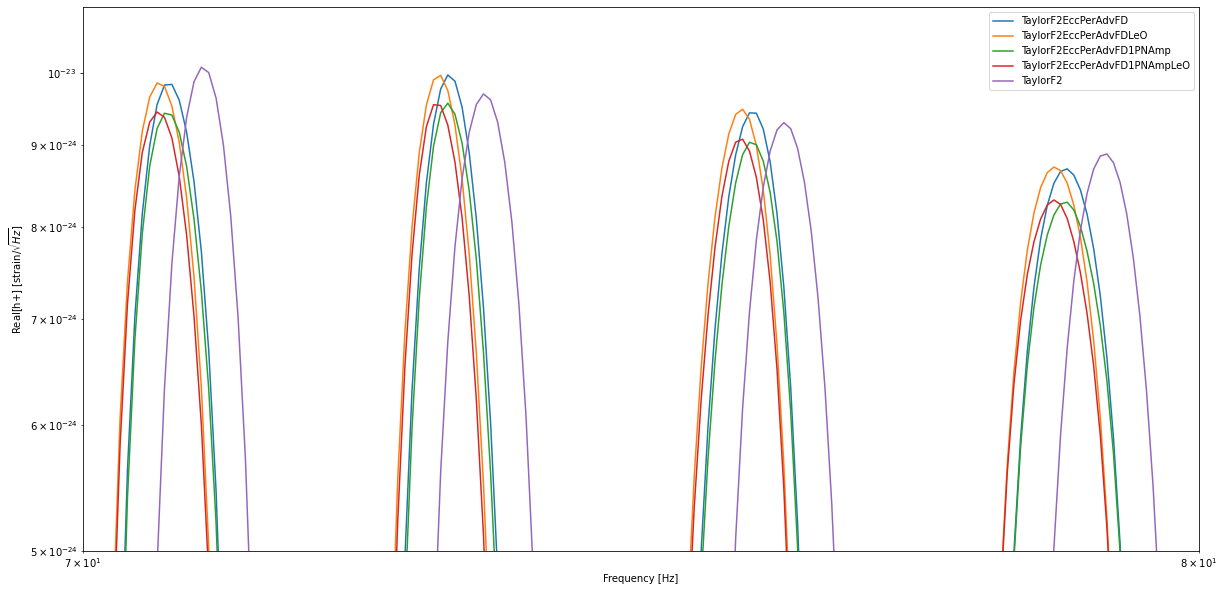

In [59]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFDLeO waveform model ################
ax.loglog(H11.frequency_array[idxs1],
          np.real(H1_injection1["plus"][idxs1]),
          label="TaylorF2EccPerAdvFDLeO")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2EccPerAdvFD1PNAmpLeO waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2EccPerAdvFD1PNAmpLeO")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.real(H1_injection4["plus"][idxs4]),
          label="TaylorF2")


#############################
ax.set_xlim(70.,80.)
ax.set_ylim(0.5e-23,1.1e-23)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Real[h+] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

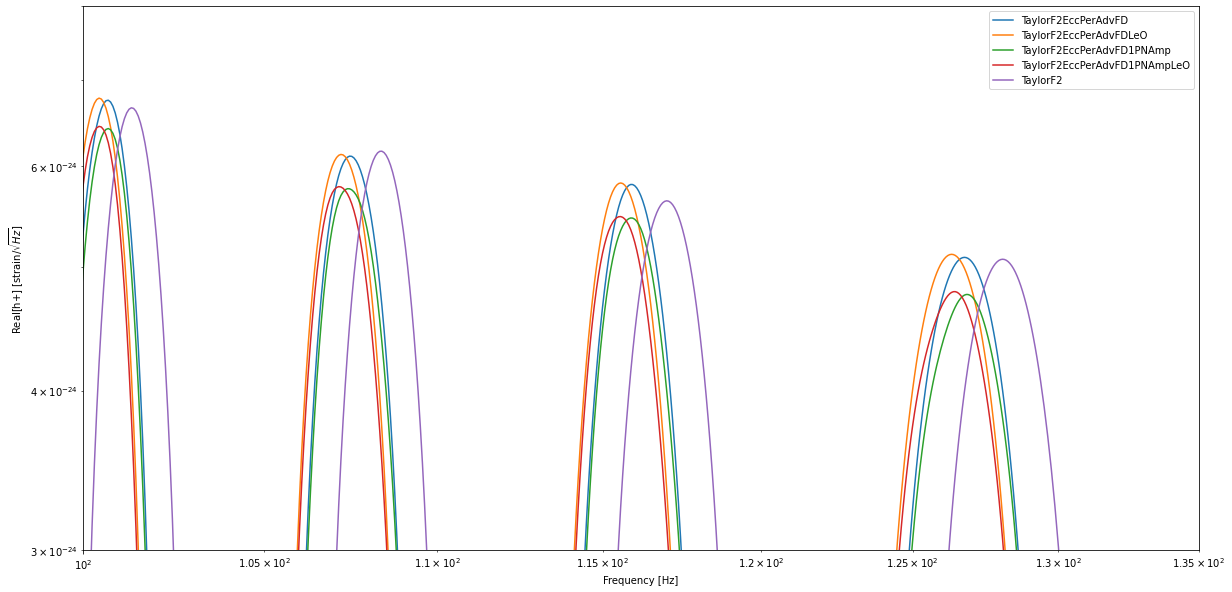

In [60]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFDLeO waveform model ################
ax.loglog(H11.frequency_array[idxs1],
          np.real(H1_injection1["plus"][idxs1]),
          label="TaylorF2EccPerAdvFDLeO")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2EccPerAdvFD1PNAmpLeO waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2EccPerAdvFD1PNAmpLeO")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.real(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
ax.set_xlim(100.,135.)
ax.set_ylim(3e-24,8e-24)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Real[h+] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()